This document shows simple examples for:

- Canonical Correlation Analysis
- Singular Vector Correlation Analysis

# CCA example with CNN models

In [1]:
import os, sys
from matplotlib import pyplot as plt
%matplotlib inline
import time
import numpy as np
import pickle
import pandas
import gzip

sys.path.append("..")
import cca_core

In [24]:
def _plot_helper(arr, xlabel, ylabel):
    plt.plot(arr, lw=2.0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

# CCA sanity check
Correlation of the same Activation Layers should be 1

In [3]:
# load activation from CNN
from numpy import genfromtxt
activation = genfromtxt('activations/m6_x6/4.csv', delimiter=',')
activation.shape

(358, 64)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
Single number for summarizing similarity
1.0000


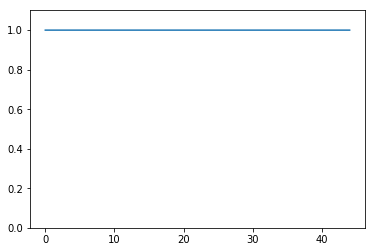

In [4]:
# sanity check
results_t = cca_core.get_cca_similarity(activation.T, activation.T, epsilon=1e-10) # small epsilon for convergence of algorithm

plt.plot(results_t["cca_coef1"])
plt.ylim((0,1.1))
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results_t["cca_coef1"])))

Single number for summarizing similarity
1.0000


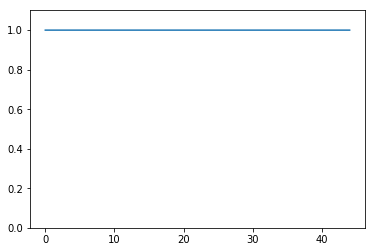

In [5]:
plt.plot(results_t["cca_coef2"])
plt.ylim((0,1.1))
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(results_t["cca_coef2"])))  # mean neuron correlation

# CCA for layer4 of m5(x5), m6(x6), different input datapoints

In [6]:
# Try for Layer 5 activations from Model5 (data5) and Model6 (data6)
from numpy import genfromtxt
acts5 = genfromtxt('activations/m5_x5/4.csv', delimiter=',')
acts6 = genfromtxt('activations/m6_x6/4.csv', delimiter=',')
print(acts5.shape, acts6.shape)

(358, 64) (358, 64)


adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
Single number for summarizing similarity
0.4682


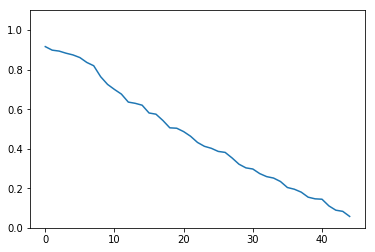

In [7]:
result = cca_core.get_cca_similarity(acts5.T, acts6.T, epsilon=1e-10)

plt.plot(result["cca_coef1"])
plt.ylim((0,1.1))
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(result["cca_coef1"])))  # mean neuron correlation

# CCA for M5(X5) and M6(X5), use the same input datapoints

In [8]:
# Try for Layer 5 activations from Model5 (data5) and Model6 (data6)
from numpy import genfromtxt
acts5 = genfromtxt('activations/m5_x5/4.csv', delimiter=',')
acts6 = genfromtxt('activations/m6_x5/4.csv', delimiter=',')
print(acts5.shape, acts6.shape)

(358, 64) (358, 64)


adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
Single number for summarizing similarity
0.7948


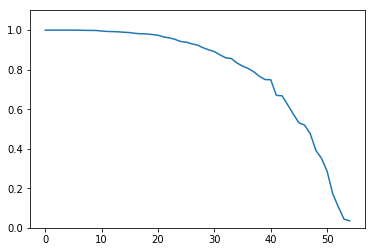

In [9]:
result = cca_core.get_cca_similarity(acts5.T, acts6.T, epsilon=1e-10)

plt.plot(result["cca_coef1"])
plt.ylim((0,1.1))
print("Single number for summarizing similarity")
print('{:.4f}'.format(np.mean(result["cca_coef1"]))) # mean neuron correlation

# SVCCA same x: M5(x5) M6(x5)


In [10]:
print("Results using SVCCA keeping 60 dims")
acts1 = np.genfromtxt('activations/m5_x5/8.csv', delimiter=',')
acts2 = np.genfromtxt('activations/m6_x5/8.csv', delimiter=',')

# Mean subtract activations
cacts1 = acts1 - np.mean(acts1, axis=0, keepdims=True)
cacts2 = acts2 - np.mean(acts2, axis=0, keepdims=True)

# Perform SVD
U1, s1, V1 = np.linalg.svd(cacts1, full_matrices=False)
U2, s2, V2 = np.linalg.svd(cacts2, full_matrices=False)

svacts1 = np.dot(s1[:60]*np.eye(60), V1[:60])
# can also compute as svacts1 = np.dot(U1.T[:20], cacts1)
svacts2 = np.dot(s2[:60]*np.eye(60), V2[:60])
# can also compute as svacts1 = np.dot(U2.T[:20], cacts2)

svcca_results = cca_core.get_cca_similarity(svacts1, svacts2, epsilon=1e-10, verbose=False)
print("SVCAA mean layer correlation:", np.mean(svcca_results["cca_coef1"]))

Results using SVCCA keeping 60 dims
CAA 0.8562700562914808


# SVCCA different x: M5(x5) M6(x6!!!)

In [11]:
# SVCCA different x
print("Results using SVCCA keeping 60 dims")
acts1 = np.genfromtxt('activations/m5_x5/8.csv', delimiter=',')
acts2 = np.genfromtxt('activations/m6_x6/8.csv', delimiter=',')

# Mean subtract activations
cacts1 = acts1 - np.mean(acts1, axis=0, keepdims=True)
cacts2 = acts2 - np.mean(acts2, axis=0, keepdims=True)

# Perform SVD
U1, s1, V1 = np.linalg.svd(cacts1, full_matrices=False)
U2, s2, V2 = np.linalg.svd(cacts2, full_matrices=False)

svacts1 = np.dot(s1[:60]*np.eye(60), V1[:60])
# can also compute as svacts1 = np.dot(U1.T[:20], cacts1)
svacts2 = np.dot(s2[:60]*np.eye(60), V2[:60])
# can also compute as svacts1 = np.dot(U2.T[:20], cacts2)

svcca_results = cca_core.get_cca_similarity(svacts1, svacts2, epsilon=1e-10, verbose=False)
print("SVCAA mean layer correlation:", np.mean(svcca_results["cca_coef1"]))

Results using SVCCA keeping 60 dims
CAA 0.9704008081428823
